# Polynomial Regression

In [5]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Polynomial Regression

Here, we have $y=0.5x^2 + x + 2$

We are expecting $a=0.5, b=1, c=2$

We got pretty close ...

I'm looking at polynomial functions a little bit different now. It's amazing
how our ancestors have figured things out.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

[1.96702] [[1.08709538 0.53778963]]


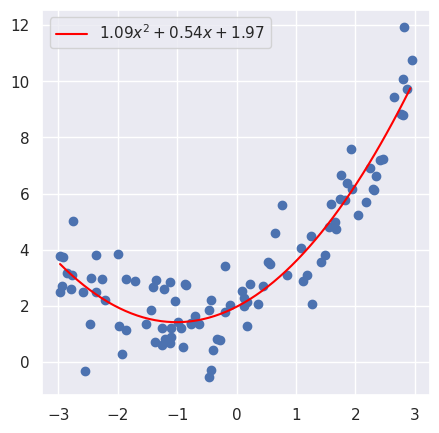

In [7]:
m, n = 100, 1
X = 6 * np.random.rand(m, n) - 3
a, b, c = 0.5, 1, 2
y = a * X**2 + b*X + c + np.random.randn(m, n)

pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

X_domain = np.arange(X.min(), X.max(), .1).reshape(-1, 1)
X_domain2 = pf.fit_transform(X_domain)
y_preds = X_domain2 @ lin_reg.coef_.T + lin_reg.intercept_

plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.plot(
    X_domain,
    y_preds,
    color="red",
    label=f"${lin_reg.coef_[0][0]:.2f}x^2 + {lin_reg.coef_[0][1]:.2f}x + {lin_reg.intercept_[0]:.2f}$",
)
plt.legend()
plt.show()

## Varying degrees

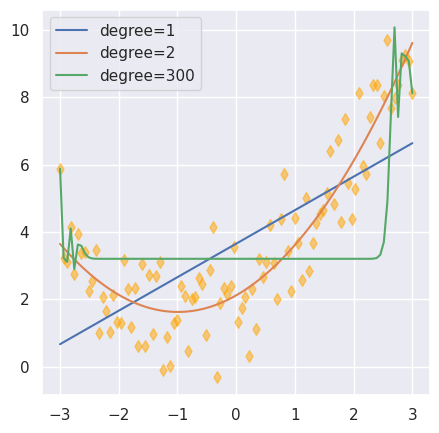

In [8]:
m,n = 100, 1
X = np.linspace(-3, 3, m).reshape(-1, 1)

# we create a target based on degree == 2
a, b, c = 0.5, 1, 2
y = a * X**2 + b*X + c + np.random.randn(m, 1)

# plot the original data
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X, y, marker="d", color='orange', alpha=0.5)

pf = PolynomialFeatures(degree=100, include_bias=False)
X_ = pf.fit_transform(X)

for d in [1, 2, 300]:
    lr = LinearRegression()
    lr.fit(X_[:, :d], y)
    y_ = (X_[:, :d] @ lr.coef_.T) + lr.intercept_
    ax.plot(X, y_, label = f"degree={d}")

plt.legend()
plt.show()